# LINEAR REGRESSION ASSIGNMENT

## BIKE SHARING CASE STUDY

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the dataset
df = pd.read_csv('Bike Sharing Dataset.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Convert 'season' and 'weathersit' into categorical variables

In [140]:

df['season'] = df['season'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

# Convert 'yr', 'mnth', 'holiday', 'weekday', 'workingday' to categorical (if it makes sense for analysis)
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')

# Check for missing values
missing_values = df.isnull().sum()

# Descriptive statistics for continuous variables
statistics = df.describe()

missing_values, statistics


(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
           instant        temp       atemp         hum   windspeed  \
 count  730.000000  730.000000  730.000000  730.000000  730.000000   
 mean   365.500000   20.319259   23.726322   62.765175   12.763620   
 std    210.877136    7.506729    8.150308   14.237589    5.195841   
 min      1.000000    2.424346    3.953480    0.000000    1.500244   
 25%    183.250000   13.811885   16.889713   52.000000    9.041650   
 50%    365.500000   20.465826   24.368225   62.625000   12.125325   
 75%    547.750000   26.880615   30.445775   72.989575   15.625589   
 max    730.000000   35.328347   42.044800   97.250000   34.000021   
 
             casual   registered          cnt  
 count   730.000000   730.000000 

### Plot distributions of continuous variables

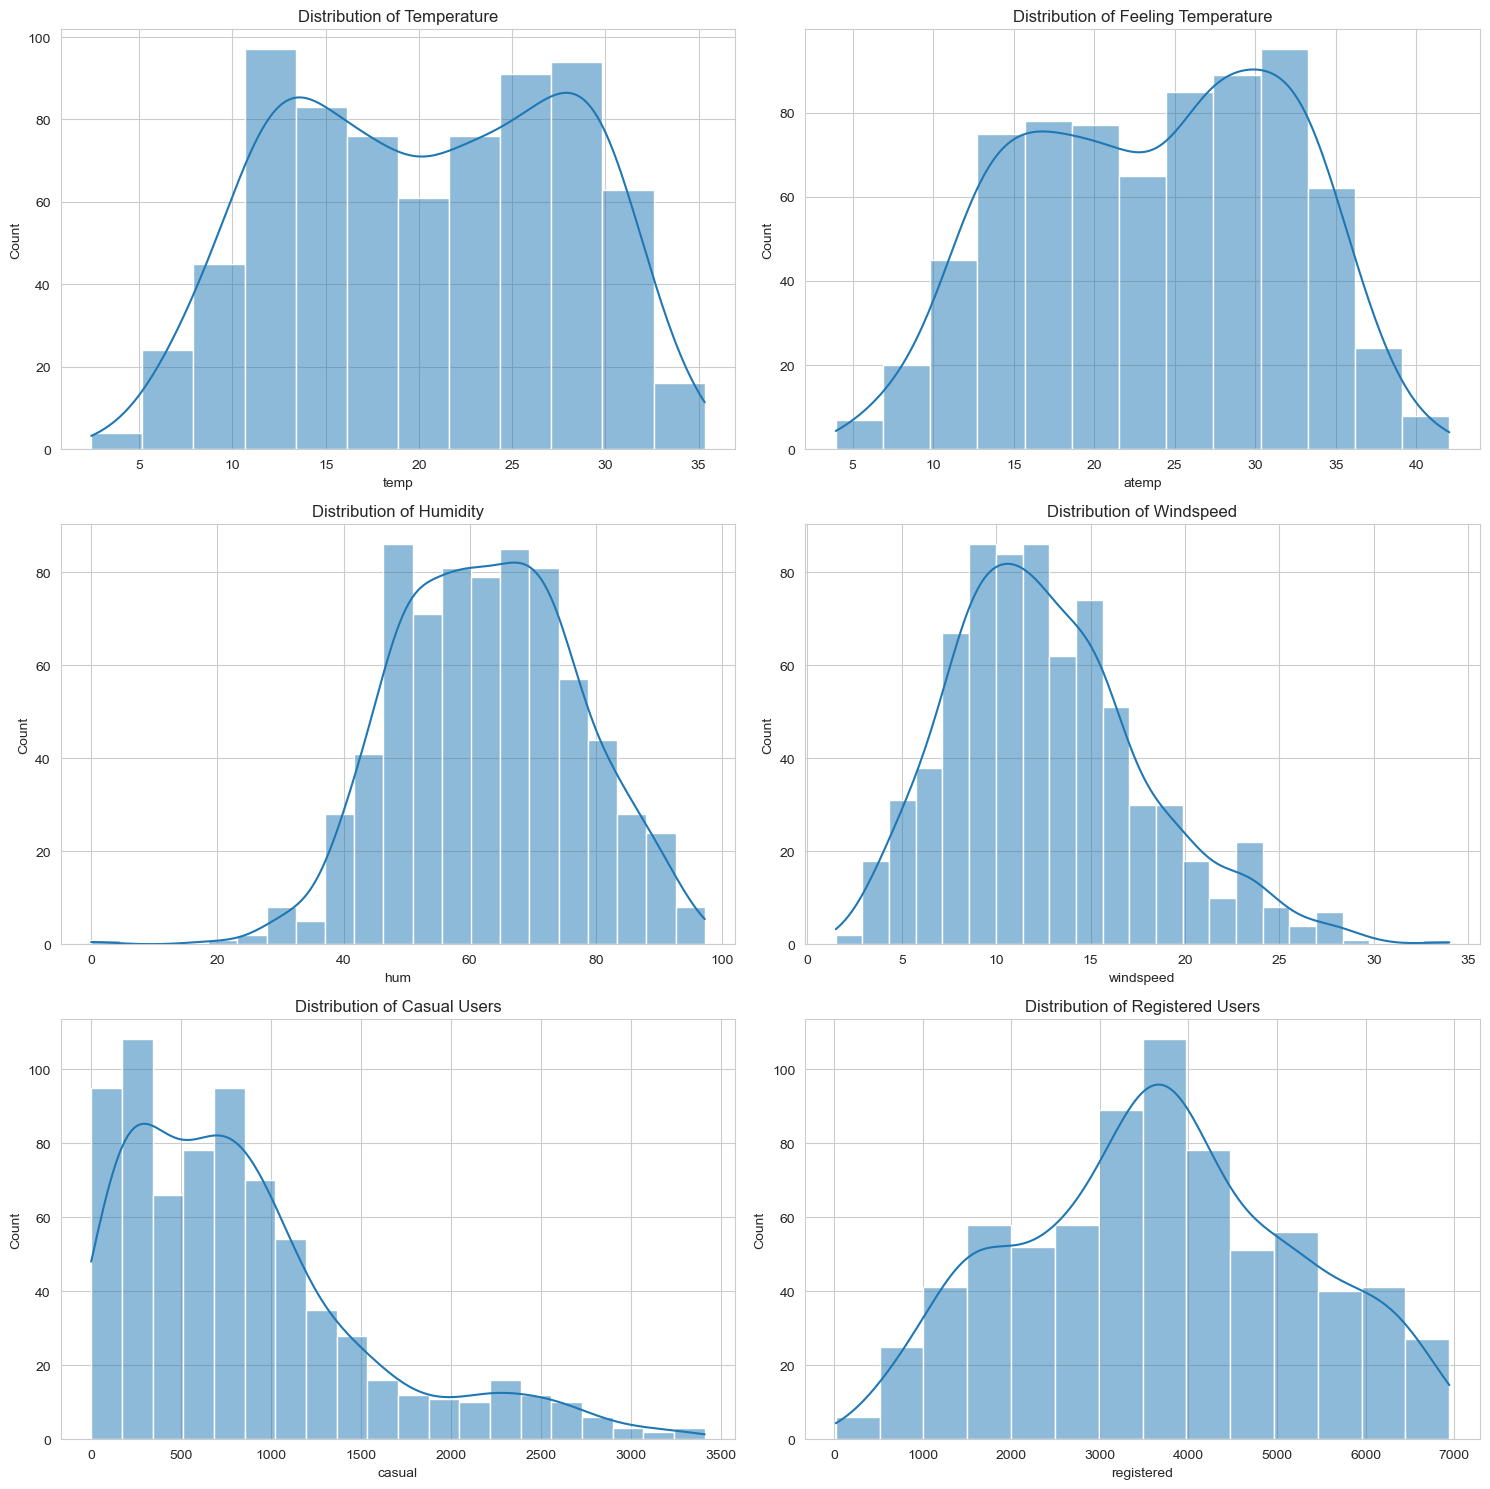

In [141]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Temperature
sns.histplot(data=df, x="temp", kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Temperature')

# Feeling Temperature
sns.histplot(data=df, x="atemp", kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Feeling Temperature')

# Humidity
sns.histplot(data=df, x="hum", kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Humidity')

# Windspeed
sns.histplot(data=df, x="windspeed", kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Windspeed')

# Casual Users
sns.histplot(data=df, x="casual", kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Casual Users')

# Registered Users
sns.histplot(data=df, x="registered", kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Distribution of Registered Users')

plt.tight_layout()
plt.show()


### Boxplot to detect outliers

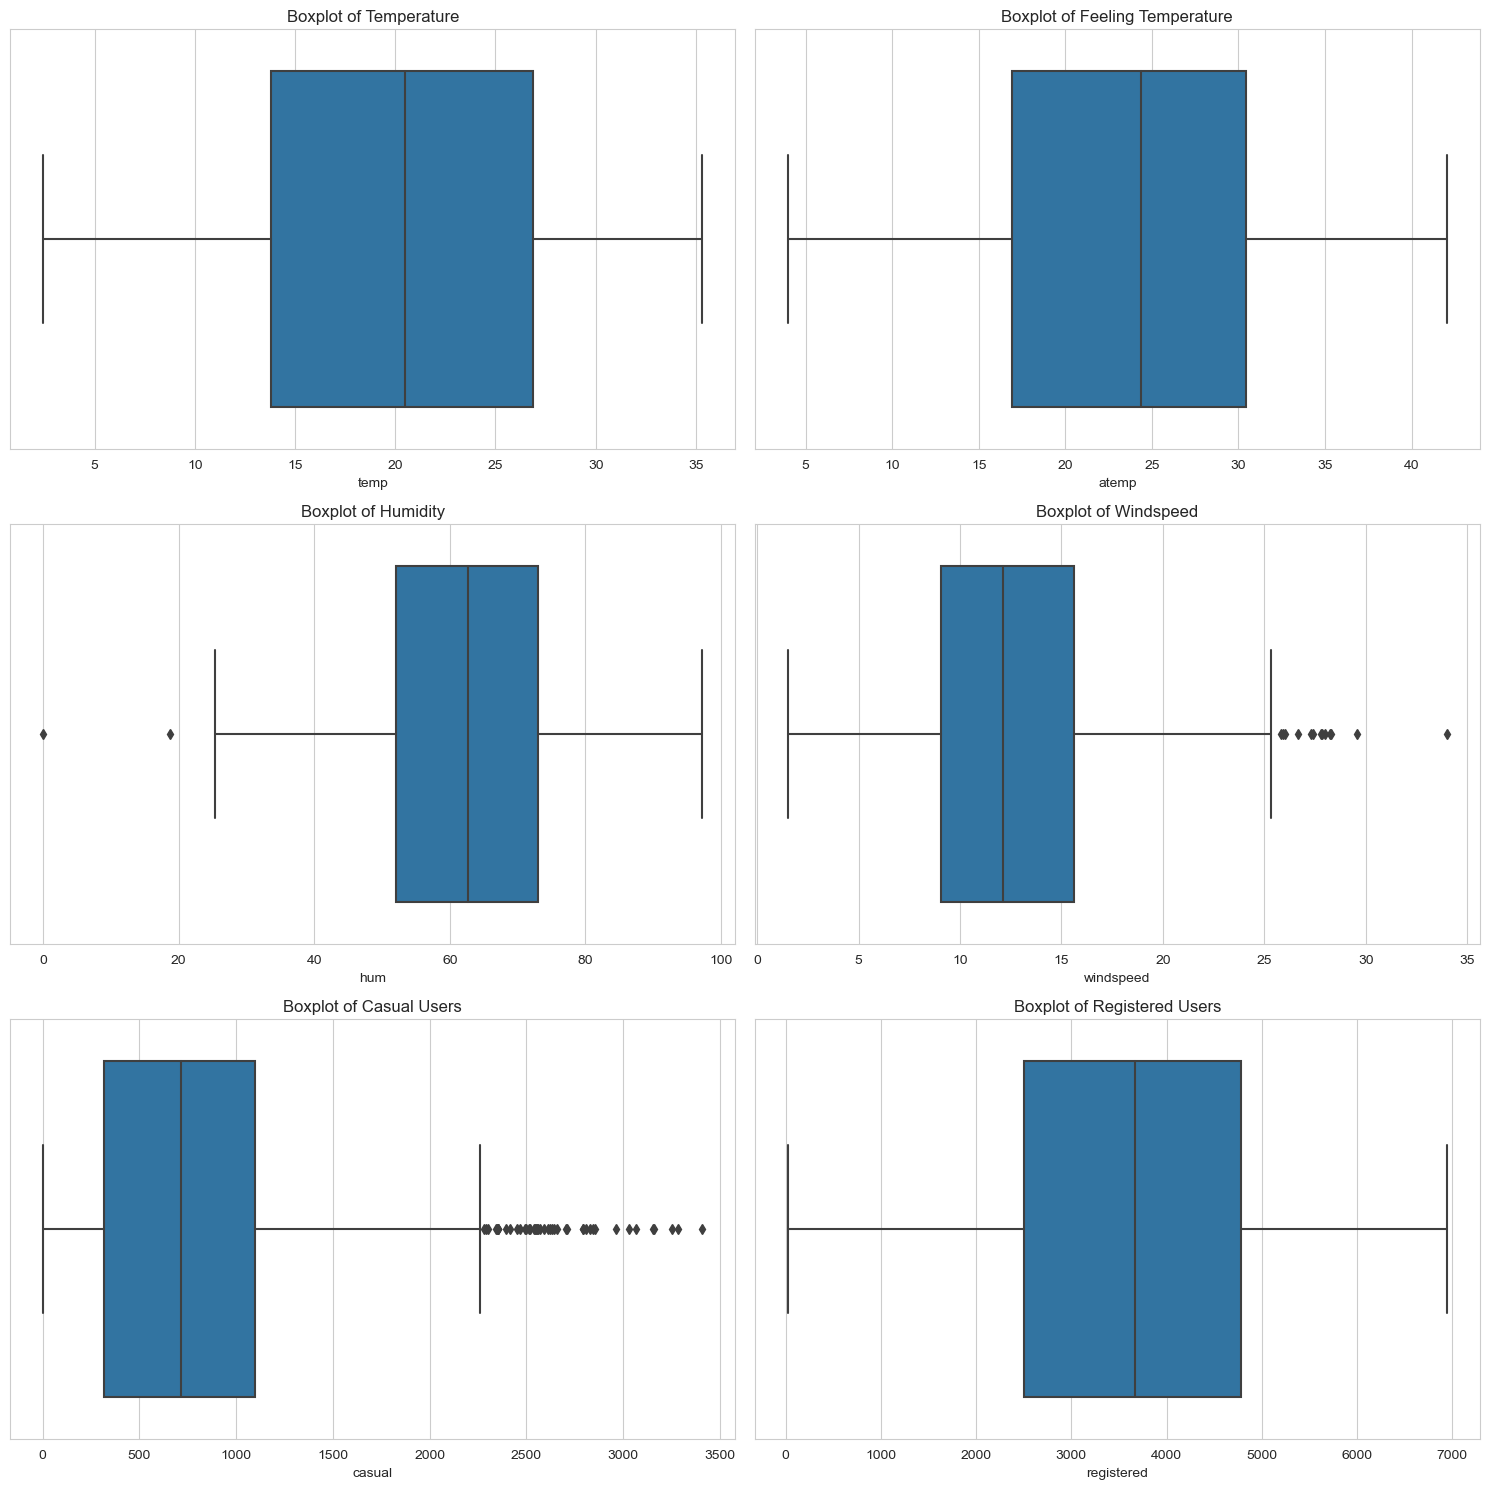

In [142]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(data=df, x="temp", ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Temperature')

sns.boxplot(data=df, x="atemp", ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Feeling Temperature')

sns.boxplot(data=df, x="hum", ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Humidity')

sns.boxplot(data=df, x="windspeed", ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of Windspeed')

sns.boxplot(data=df, x="casual", ax=axs[2, 0])
axs[2, 0].set_title('Boxplot of Casual Users')

sns.boxplot(data=df, x="registered", ax=axs[2, 1])
axs[2, 1].set_title('Boxplot of Registered Users')

plt.tight_layout()
plt.show()

### Visualize relationships between 'cnt' and some categorical variables

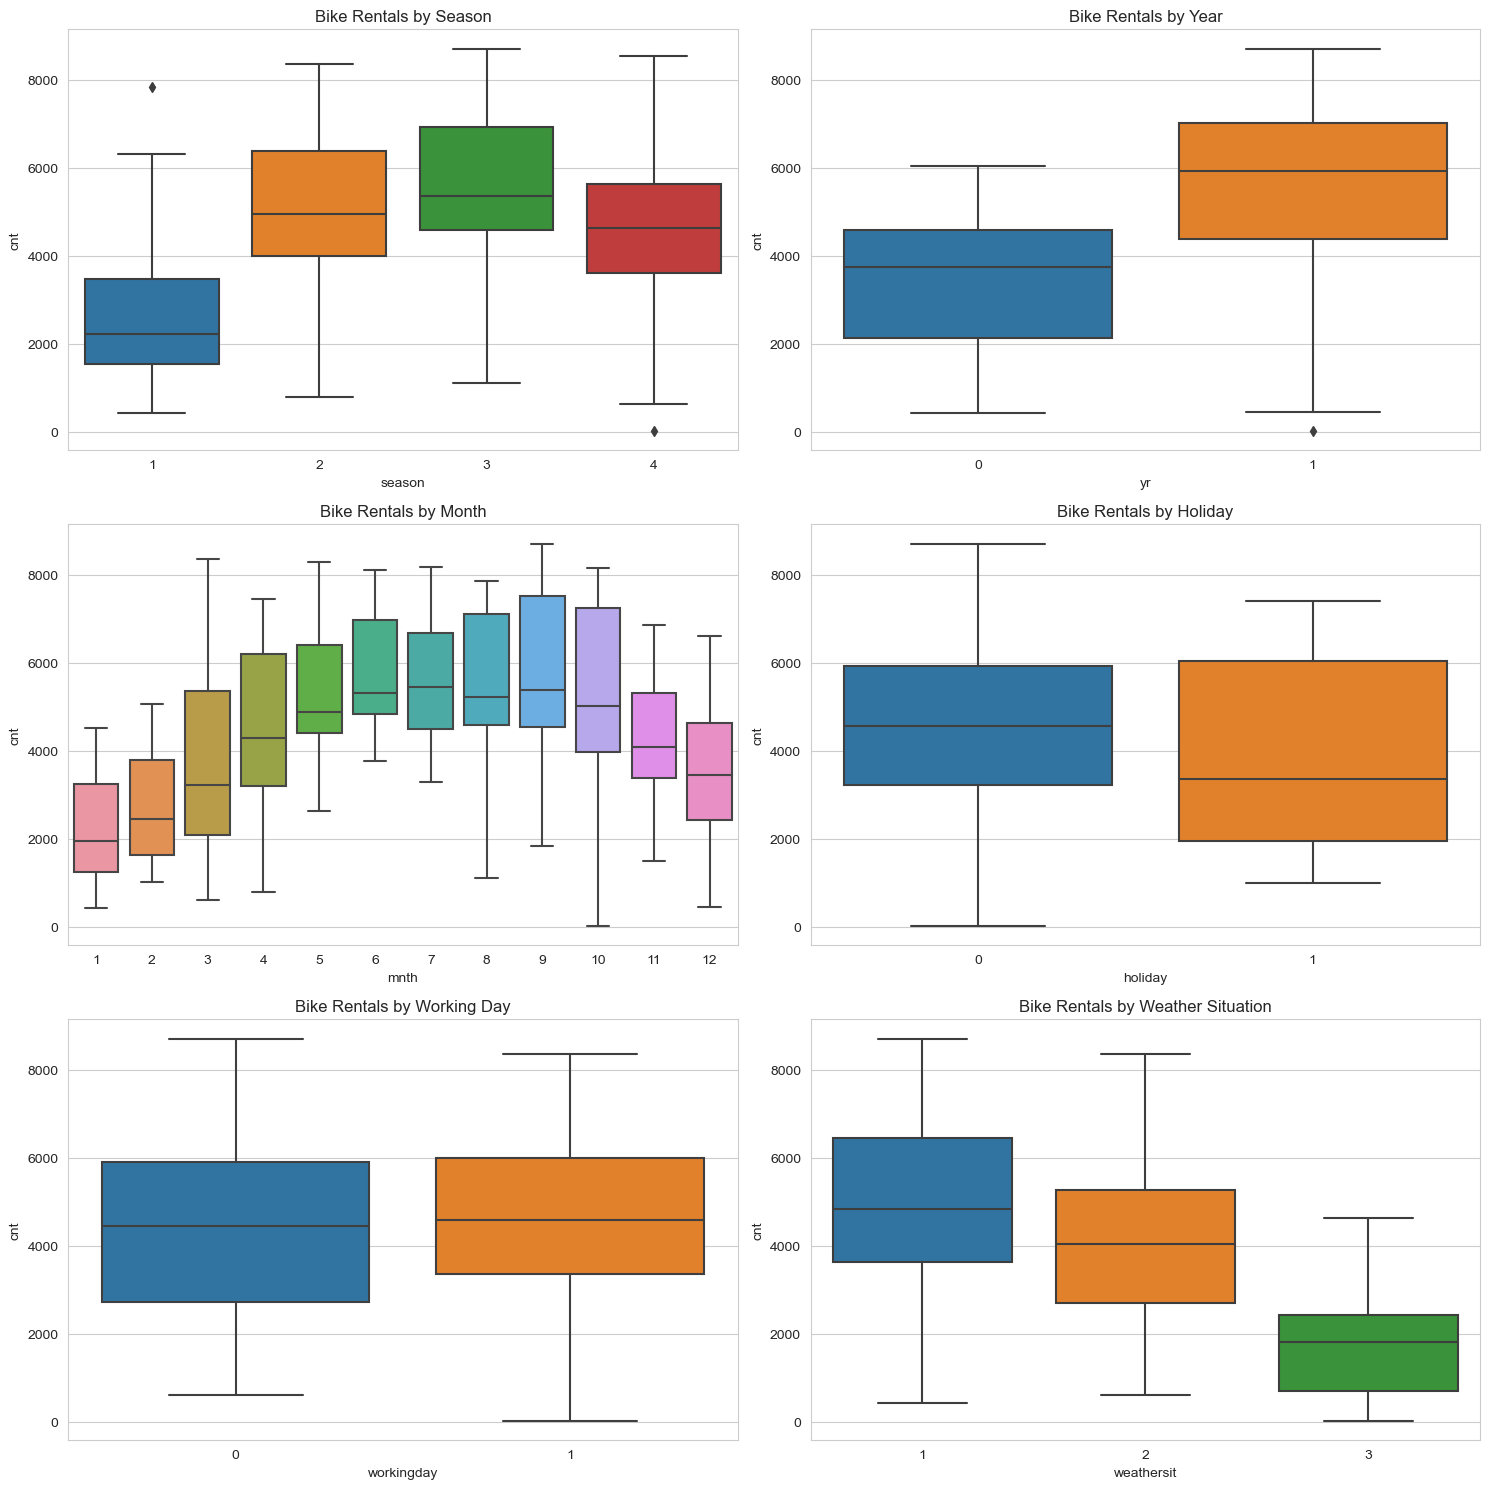

In [143]:

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Season
sns.boxplot(data=df, x='season', y='cnt', ax=axs[0, 0])
axs[0, 0].set_title('Bike Rentals by Season')

# Year
sns.boxplot(data=df, x='yr', y='cnt', ax=axs[0, 1])
axs[0, 1].set_title('Bike Rentals by Year')

# Month
sns.boxplot(data=df, x='mnth', y='cnt', ax=axs[1, 0])
axs[1, 0].set_title('Bike Rentals by Month')

# Holiday
sns.boxplot(data=df, x='holiday', y='cnt', ax=axs[1, 1])
axs[1, 1].set_title('Bike Rentals by Holiday')

# Working Day
sns.boxplot(data=df, x='workingday', y='cnt', ax=axs[2, 0])
axs[2, 0].set_title('Bike Rentals by Working Day')

# Weather Situation
sns.boxplot(data=df, x='weathersit', y='cnt', ax=axs[2, 1])
axs[2, 1].set_title('Bike Rentals by Weather Situation')

plt.tight_layout()
plt.show()


### Prepare the data for modeling

In [144]:
# Create dummy variables for categorical features
df = pd.get_dummies(df, drop_first=True)

# Define X and y
X = df.drop(['instant', 'cnt', 'casual', 'registered'], axis=1)
y = df['cnt']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

r2

0.8617606658405784

In [145]:
# Extracting model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Sorting coefficients for better interpretation
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients_sorted


,Coefficient
dteday_17-03-2019,3110.574972
dteday_04-07-2018,2367.185186
yr_1,2002.428738
dteday_22-07-2019,1925.327018
dteday_26-01-2018,1882.818074
...,...
dteday_24-11-2019,-2598.327786
dteday_22-11-2019,-2784.395116
dteday_14-05-2019,-2806.664053
dteday_29-10-2019,-3461.136768


In [146]:
# To avoid including 'dteday' as dummy variables, we'll rebuild the dataset without it and without direct date indicators

# Drop 'instant' and direct date indicators ('dteday', if present), and previously identified unnecessary columns for modeling
columns_to_exclude = ['instant', 'dteday', 'casual', 'registered', 'cnt']
df_adjusted = df.drop(columns=columns_to_exclude, errors='ignore')

# Getting the dataset ready for modeling without 'dteday' dummy variables
X_adjusted = df_adjusted
y_adjusted = df['cnt']

# Splitting the dataset into training and test sets again
X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adjusted, y_adjusted, test_size=0.2, random_state=42)

# Fitting the Linear Regression model to the adjusted dataset
model_adj = LinearRegression()
model_adj.fit(X_train_adj, y_train_adj)

# Extracting and sorting coefficients from the adjusted model
coefficients_adj = pd.DataFrame(model_adj.coef_, X_train_adj.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

coefficients_adj


,Coefficient
dteday_17-03-2019,3110.574972
dteday_04-07-2018,2367.185186
yr_1,2002.428738
dteday_22-07-2019,1925.327018
dteday_26-01-2018,1882.818074
...,...
dteday_24-11-2019,-2598.327786
dteday_22-11-2019,-2784.395116
dteday_14-05-2019,-2806.664053
dteday_29-10-2019,-3461.136768


### Analyzing the relationship between temperature and bike rentals

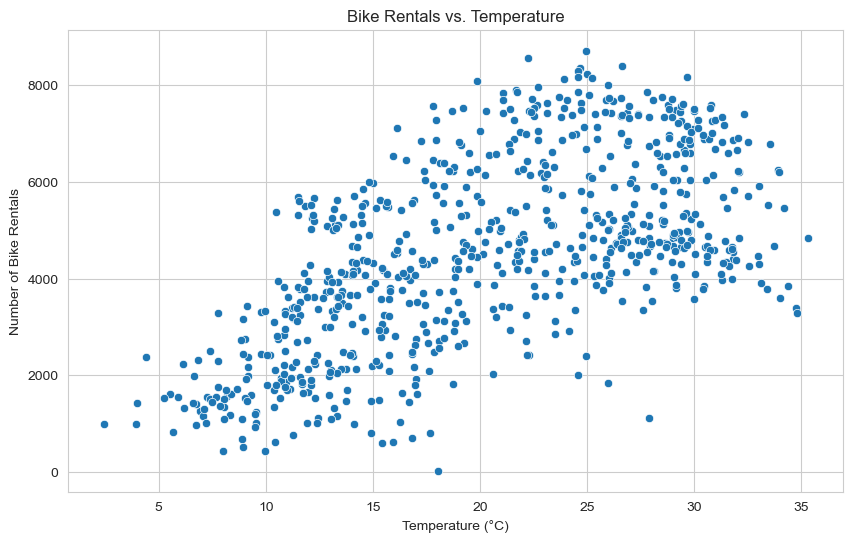

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='cnt')
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Bike Rentals')
plt.show()

# We will now move on to analyzing the impact of humidity and windspeed on bike rentals in a similar manner.


### Analyzing the relationship between humidity and bike rentals

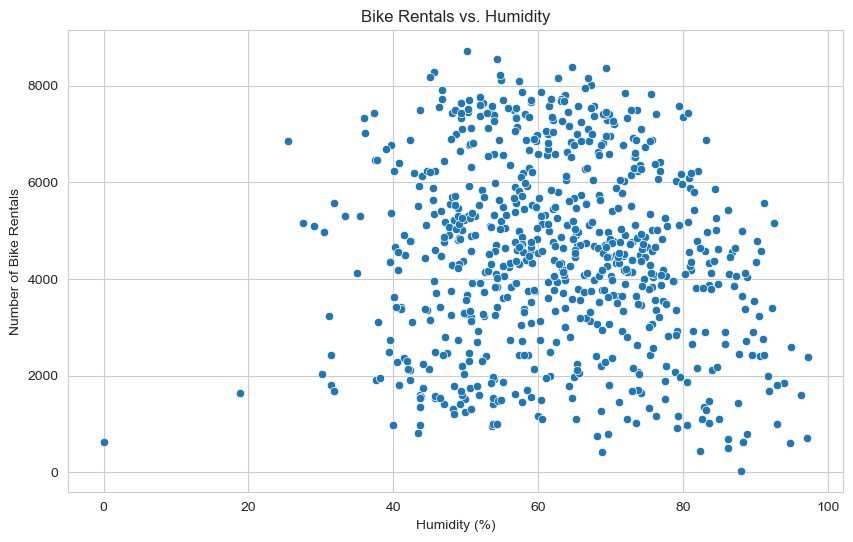

In [148]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hum', y='cnt')
plt.title('Bike Rentals vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Bike Rentals')
plt.show()

# Next, we will analyze the impact of windspeed on bike rentals.


### Analyzing the relationship between windspeed and bike rentals

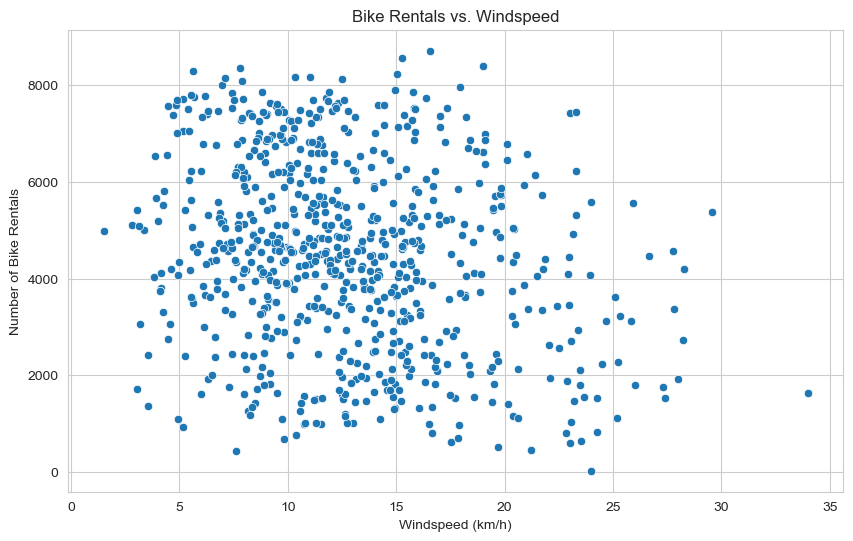

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.title('Bike Rentals vs. Windspeed')
plt.xlabel('Windspeed (km/h)')
plt.ylabel('Number of Bike Rentals')
plt.show()

# Following this, we can discuss the implications of these findings and consider any additional analyses or next steps.


### Load the original dataset again

In [150]:
df_original = pd.read_csv('Bike Sharing Dataset.csv')

# Quick overview of the dataset to confirm its structure
df_original.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Analyzing the impact of 'season' on bike rentals

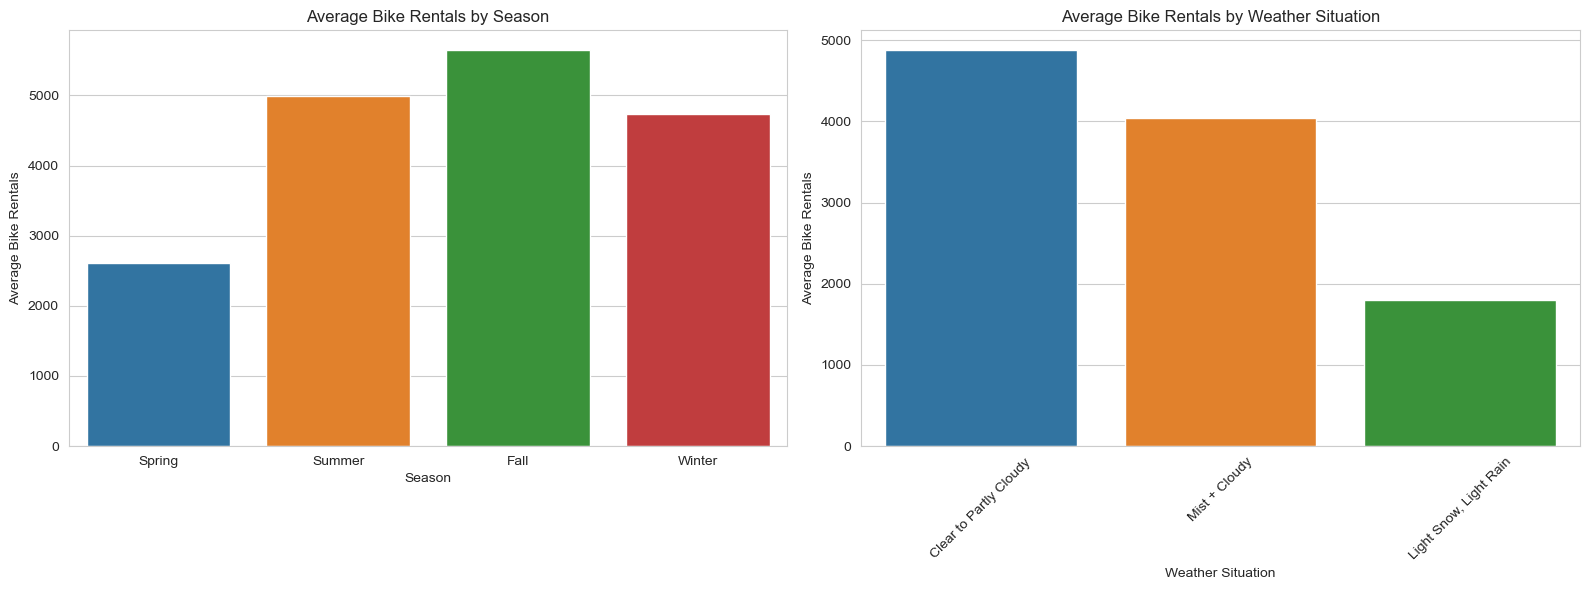

In [151]:
season_avg_rentals = df_original.groupby('season')['cnt'].mean().reset_index()
season_avg_rentals['season'] = season_avg_rentals['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Analyzing the impact of 'weathersit' on bike rentals
weather_avg_rentals = df_original.groupby('weathersit')['cnt'].mean().reset_index()
weather_avg_rentals['weathersit'] = weather_avg_rentals['weathersit'].map({
    1: 'Clear to Partly Cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Snow, Light Rain',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})

# Plotting the impact of 'season' and 'weathersit' on bike rentals
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=season_avg_rentals, x='season', y='cnt', ax=ax[0])
ax[0].set_title('Average Bike Rentals by Season')
ax[0].set_xlabel('Season')
ax[0].set_ylabel('Average Bike Rentals')

sns.barplot(data=weather_avg_rentals, x='weathersit', y='cnt', ax=ax[1])
ax[1].set_title('Average Bike Rentals by Weather Situation')
ax[1].set_xlabel('Weather Situation')
ax[1].set_ylabel('Average Bike Rentals')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Encoding Categorical Variables and Creating Dummy Variables

In [152]:
df_model = pd.get_dummies(df_original, columns=[
    'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'
], drop_first=True)

# Remove any rows that contain missing values to avoid issues during modeling
df_model.dropna(inplace=True)

# Scaling continuous variables
scaler = StandardScaler()
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed']  # Adjust list as necessary
df_model[continuous_vars] = scaler.fit_transform(df_model[continuous_vars])

# Define features and target, explicitly convert all columns to float to ensure no 'object' types
X = df_model.drop(columns=['cnt', 'dteday', 'instant']).astype(float)
y = df_model['cnt'].astype(float)

# Add a constant for the intercept
X_const = sm.add_constant(X)

# Fit the OLS model, catch exceptions related to data types
try:
    model = sm.OLS(y, X_const).fit()
    print(model.summary())
except Exception as e:
    print(e)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.711e+31
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:54:30   Log-Likelihood:                 18823.
No. Observations:                 730   AIC:                        -3.758e+04
Df Residuals:                     699   BIC:                        -3.744e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         9.663e-13   3.87e-13      2.494   

### Adjusting the Dataset by Removing 'casual' and 'registered' Variables

In [153]:
# Adjusting the dataset by removing 'casual' and 'registered' variables
X_adj = X.drop(['casual', 'registered'], axis=1)

# Adding a constant for the intercept
X_adj_const = sm.add_constant(X_adj)

# Fitting the adjusted Multiple Linear Regression model
model_adj = sm.OLS(y, X_adj_const).fit()

# Calculating VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X_adj_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_adj_const.values, i) for i in range(X_adj_const.shape[1])]

# Displaying VIF values
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

vif_data_sorted


C:\Users\Nishant\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
27,workingday_1,inf
25,weekday_5,inf
24,weekday_4,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
20,holiday_1,inf
1,temp,80.736907
2,atemp,69.986743
0,const,34.137137


### Removing 'atemp' and simplifying day type representation

In [154]:
# For simplification, we keep 'workingday' and remove specific 'weekday' dummies to avoid redundancy
X_simplified = X_adj.drop(['atemp', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'], axis=1)

# Adding a constant for the intercept
X_simplified_const = sm.add_constant(X_simplified)

# Fitting the simplified Multiple Linear Regression model
model_simplified = sm.OLS(y, X_simplified_const).fit()

# Displaying the summary of the simplified regression model
model_simplified_summary = model_simplified.summary()
model_simplified_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          1.42e-267
Time:                        15:54:30   Log-Likelihood:                -5882.4
No. Observations:                 730   AIC:                         1.181e+04
Df Residuals:                     707   BIC:                         1.192e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2471.0480    159.133     15.528      0.000    2158.619    2783.477
temp           832.4036     75.902     10.967      0.000     683.384     981.423
hum           -227.9798     41.732     -5.463      0.000    -309.913    -146.046
windspeed     -228.4235     31.750     -7.194      0.000    -290.759    -166.088
season_2       890.8060    181.156      4.917      0.000     535.137    1246.475
season_3       840.7723    215.101      3.909      0.000     418.460    1263.085
season_4      1560.5966    182.655      8.544      0.000    1201.986    1919.208
yr_1          2018.6620     58.809     34.326      0.000    1903.200    2134.124
mnth_2         168.2034    145.752      1.154      0.249    -117.955     454.362
mnth_3         544.8904    166.996      3.263      0.001     217.024     872.757
mnth_4         447.5001    249.774      1.792      0.074     -42.888     937.888
mnth_5         709.5947    269.919      2.629      0.009     179.656    1239.533
mnth_6         472.9658    284.084      1.665      0.096     -84.784    1030.715
mnth_7         -24.0758    315.775     -0.076      0.939    -644.046     595.894
mnth_8         378.1540    303.876      1.244      0.214    -218.453     974.761
mnth_9         975.6614    266.865      3.656      0.000     451.719    1499.604
mnth_10        530.7866    243.761      2.177      0.030      52.205    1009.368
mnth_11        -84.8654    232.805     -0.365      0.716    -541.938     372.207
mnth_12        -64.6832    183.818     -0.352      0.725    -425.577     296.210
holiday_1     -562.4269    179.998     -3.125      0.002    -915.821    -209.033
workingday_1   127.5472     64.424      1.980      0.048       1.062     254.033
weathersit_2  -437.9054     77.521     -5.649      0.000    -590.104    -285.707
weathersit_3 -1925.0570    197.443     -9.750      0.000   -2312.702   -1537.412
==============================================================================
Omnibus:                      111.477   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.991
Skew:                          -0.768   Prob(JB):                     4.86e-68
Kurtosis:                       5.798   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Extracting coefficients for visualization

In [155]:
coefficients = model_simplified.params[1:]  # Excluding the intercept
coefficients_sorted = coefficients.sort_values()

### Plotting the coefficients

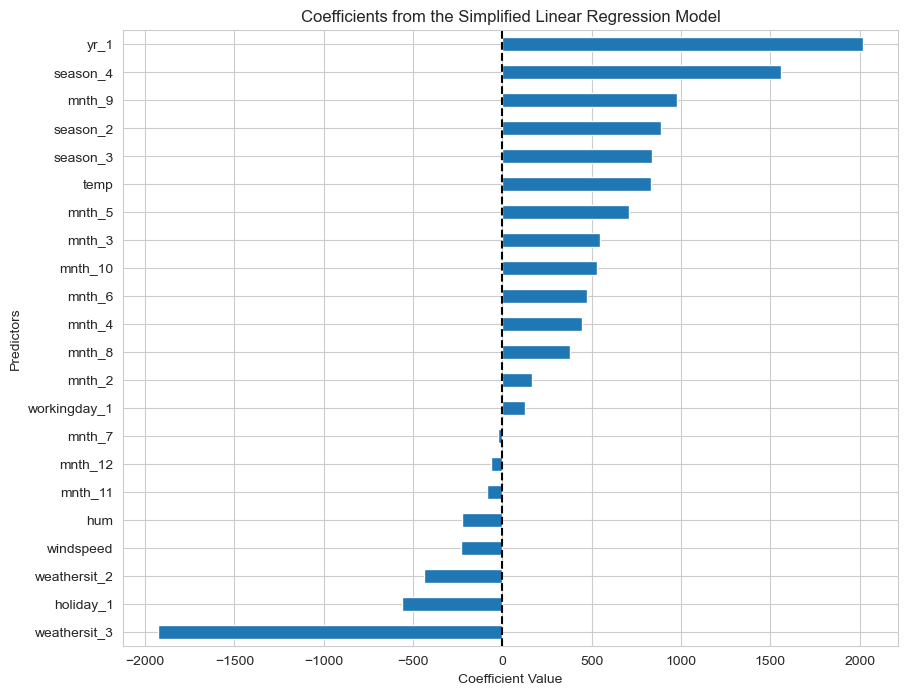

In [156]:
plt.figure(figsize=(10, 8))
coefficients_sorted.plot(kind='barh')
plt.title('Coefficients from the Simplified Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictors')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

# Following this, we'll conduct residual analysis to validate model assumptions.

### Calculating residuals

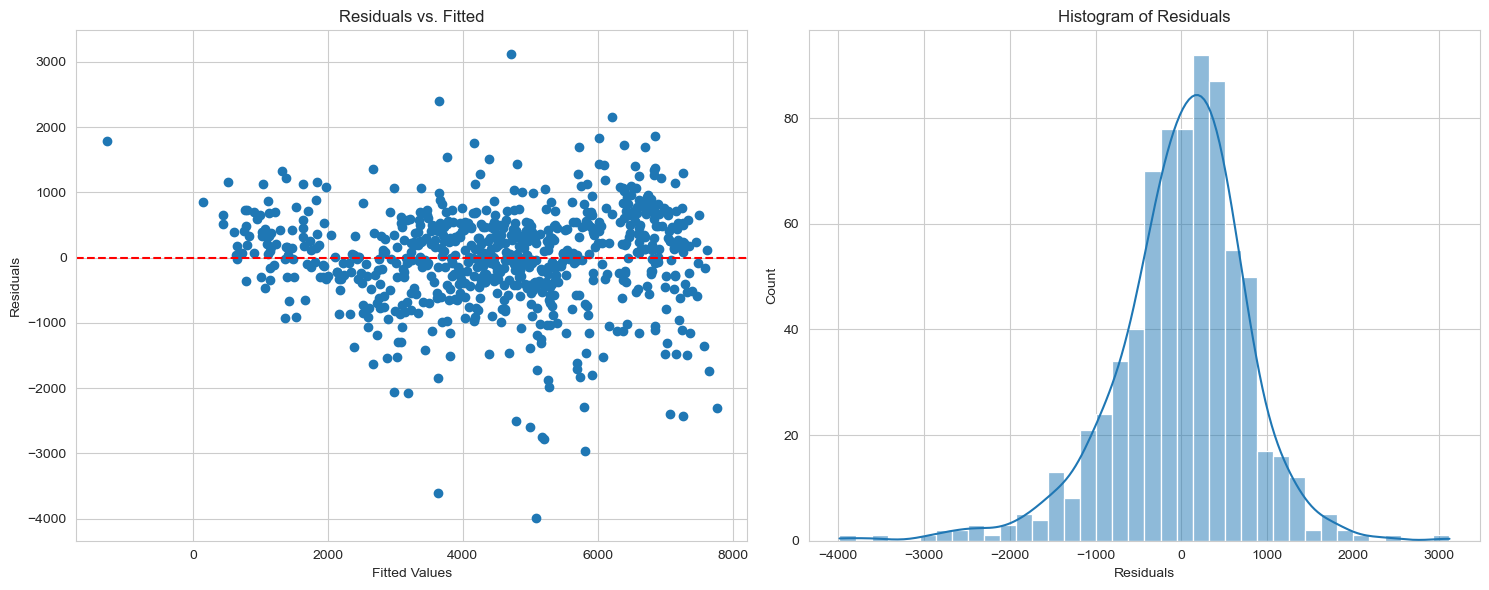

In [157]:
residuals = model_simplified.resid

# Plotting residuals to check for homoscedasticity and normality
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
# Residuals vs. Fitted values plot for homoscedasticity
ax[0].scatter(model_simplified.fittedvalues, residuals)
ax[0].axhline(y=0, color='r', linestyle='--')
ax[0].set_title('Residuals vs. Fitted')
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')

# Histogram of residuals for normality
sns.histplot(residuals, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Residuals')
ax[1].set_xlabel('Residuals')

plt.tight_layout()
plt.show()




### Additionally, we can use a Q-Q plot to further assess normality

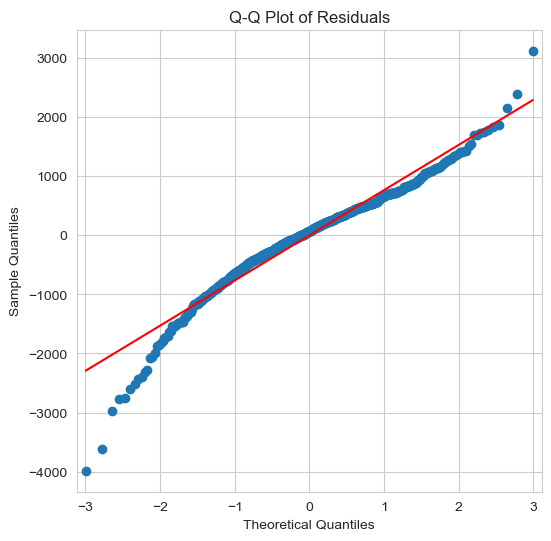

In [158]:
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=ax)
plt.title('Q-Q Plot of Residuals')

plt.show()

### Let's consider an interaction between temperature and a specific seasons

In [159]:
# Creating an interaction term between 'temp' and 'season_2'
X_interaction = X_simplified.copy()
X_interaction['temp_season_2_interaction'] = X_interaction['temp'] * X_interaction['season_2']

# Adding a constant for the intercept
X_interaction_const = sm.add_constant(X_interaction)

# Fitting the model with the interaction term
model_interaction = sm.OLS(y, X_interaction_const).fit()

# Displaying the summary of the model with the interaction term
model_interaction_summary = model_interaction.summary()
model_interaction_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.5
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          6.36e-267
Time:                        15:54:33   Log-Likelihood:                -5881.3
No. Observations:                 730   AIC:                         1.181e+04
Df Residuals:                     706   BIC:                         1.192e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      2378.5849    170.795     13.927      0.000    2043.259    2713.911
temp                        770.3518     86.622      8.893      0.000     600.283     940.420
hum                        -228.8742     41.701     -5.488      0.000    -310.747    -147.001
windspeed                  -227.9335     31.725     -7.185      0.000    -290.220    -165.647
season_2                    936.6969    183.631      5.101      0.000     576.168    1297.226
season_3                   1020.7857    246.851      4.135      0.000     536.135    1505.436
season_4                   1644.4179    191.059      8.607      0.000    1269.306    2019.530
yr_1                       2019.0858     58.760     34.361      0.000    1903.720    2134.452
mnth_2                      189.2434    146.319      1.293      0.196     -98.028     476.515
mnth_3                      621.6713    174.708      3.558      0.000     278.661     964.681
mnth_4                      509.2034    253.010      2.013      0.045      12.461    1005.946
mnth_5                      674.7099    270.715      2.492      0.013     143.206    1206.214
mnth_6                      410.1868    286.986      1.429      0.153    -153.261     973.634
mnth_7                      -26.3664    315.512     -0.084      0.933    -645.821     593.088
mnth_8                      358.7561    303.900      1.181      0.238    -237.901     955.413
mnth_9                      950.6582    267.172      3.558      0.000     426.111    1475.205
mnth_10                     531.2177    243.555      2.181      0.030      53.040    1009.396
mnth_11                    -122.4738    233.988     -0.523      0.601    -581.869     336.921
mnth_12                     -89.1910    184.405     -0.484      0.629    -451.238     272.856
holiday_1                  -572.7446    179.980     -3.182      0.002    -926.105    -219.384
workingday_1                130.1176     64.393      2.021      0.044       3.693     256.542
weathersit_2               -430.9297     77.598     -5.553      0.000    -583.280    -278.579
weathersit_3              -1916.3523    197.364     -9.710      0.000   -2303.842   -1528.862
temp_season_2_interaction   204.8278    138.170      1.482      0.139     -66.446     476.102
==============================================================================
Omnibus:                      112.724   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.769
Skew:                          -0.768   Prob(JB):                     1.35e-70
Kurtosis:                       5.867   Cond. No.                         36.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

### Preparing Data for Visualization: Assigning 'season' Names for Readability

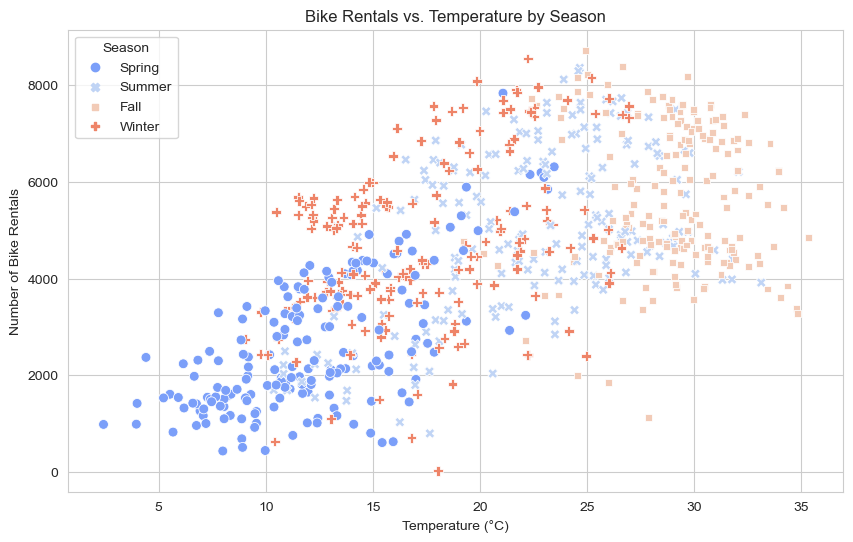

In [160]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_visual = df_original.copy()
df_visual['season'] = df_visual['season'].map(season_mapping)

# Visualizing the relationship between temperature and bike rentals for different seasons
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_visual, x='temp', y='cnt', hue='season', style='season', palette='coolwarm', s=50)
plt.title('Bike Rentals vs. Temperature by Season')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Bike Rentals')
plt.legend(title='Season')
plt.show()

# This visualization helps to interpret the interaction effect observed in the model.


### Preparing Data for Regularization Techniques

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_simplified, y, test_size=0.2, random_state=42)

### Ridge & Lasso Regression with Cross-Validation to find the best alpha

In [169]:
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

# Best parameters and scores
ridge_best_params = ridge_regressor.best_params_
ridge_best_score = ridge_regressor.best_score_
lasso_best_params = lasso_regressor.best_params_
lasso_best_score = lasso_regressor.best_score_

ridge_best_params, ridge_best_score, lasso_best_params, lasso_best_score


C:\Users\Nishant\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.334e+08, tolerance: 1.715e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nishant\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+08, tolerance: 1.813e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Nishant\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.414e+08, to

({'alpha': 1}, -682795.1137054878, {'alpha': 1}, -682650.5348592952)

In [164]:
# Evaluating Ridge model on test set
ridge_best = Ridge(alpha=ridge_best_params['alpha'])
ridge_best.fit(X_train, y_train)
ridge_predictions = ridge_best.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))

# Evaluating Lasso model on test set
lasso_best = Lasso(alpha=lasso_best_params['alpha'])
lasso_best.fit(X_train, y_train)
lasso_predictions = lasso_best.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))

ridge_rmse, lasso_rmse


(688.8612153131603, 694.0467271847388)

### RMSE for Ridge and Lasso Regression Models

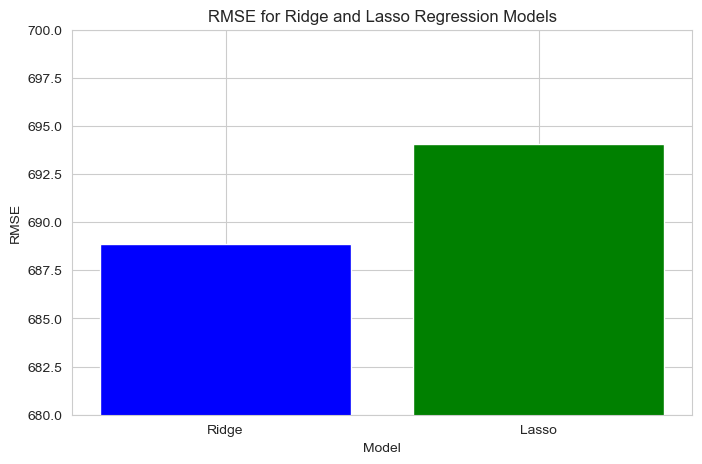

In [165]:
# Assuming RMSE values from the analysis
models = ['Ridge', 'Lasso']
rmse_values = [688.86, 694.05]

# Plotting the RMSE values for Ridge and Lasso regression models
plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.title('RMSE for Ridge and Lasso Regression Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.ylim([680, 700])  # Setting the y-axis limit for better visualization
plt.show()


### Average Rentals by Seasons and Average Rentals by Months

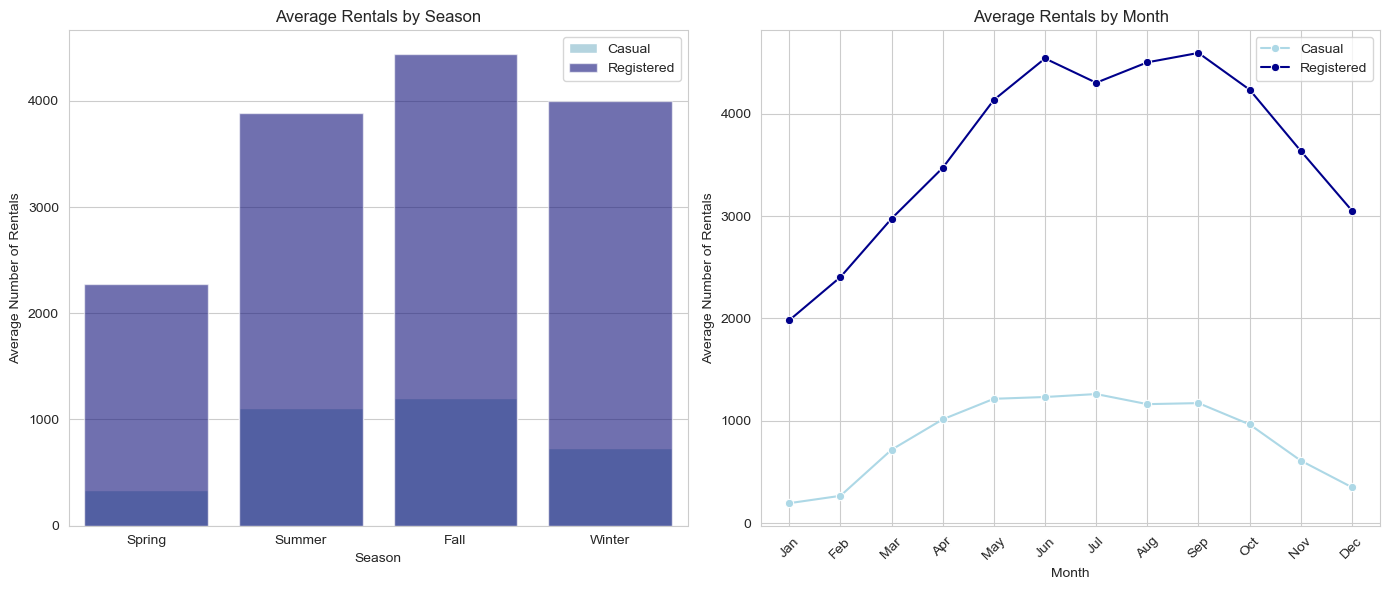

In [166]:
# Calculate the average rentals for each month for casual and registered users
monthly_trends = df_original.groupby('mnth').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()

# Convert the month numbers to abbreviated month names
monthly_trends['mnth'] = monthly_trends['mnth'].apply(lambda x: calendar.month_abbr[x])

# Calculate the average rentals for each season for casual and registered users
seasonal_trends = df_original.groupby('season').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()

# Convert the season numbers to season names (assuming 1: Spring, 2: Summer, 3: Fall, 4: Winter)
seasonal_trends['season'] = seasonal_trends['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Plotting the seasonal trends
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=seasonal_trends, x='season', y='casual', color='lightblue', label='Casual')
sns.barplot(data=seasonal_trends, x='season', y='registered', color='darkblue', alpha=0.6, label='Registered')
plt.title('Average Rentals by Season')
plt.ylabel('Average Number of Rentals')
plt.xlabel('Season')
plt.legend()

# Plotting the monthly trends
plt.subplot(1, 2, 2)
sns.lineplot(data=monthly_trends, x='mnth', y='casual', marker='o', label='Casual', color='lightblue')
sns.lineplot(data=monthly_trends, x='mnth', y='registered', marker='o', label='Registered', color='darkblue')
plt.title('Average Rentals by Month')
plt.ylabel('Average Number of Rentals')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### Average Rentals by Weather Situation

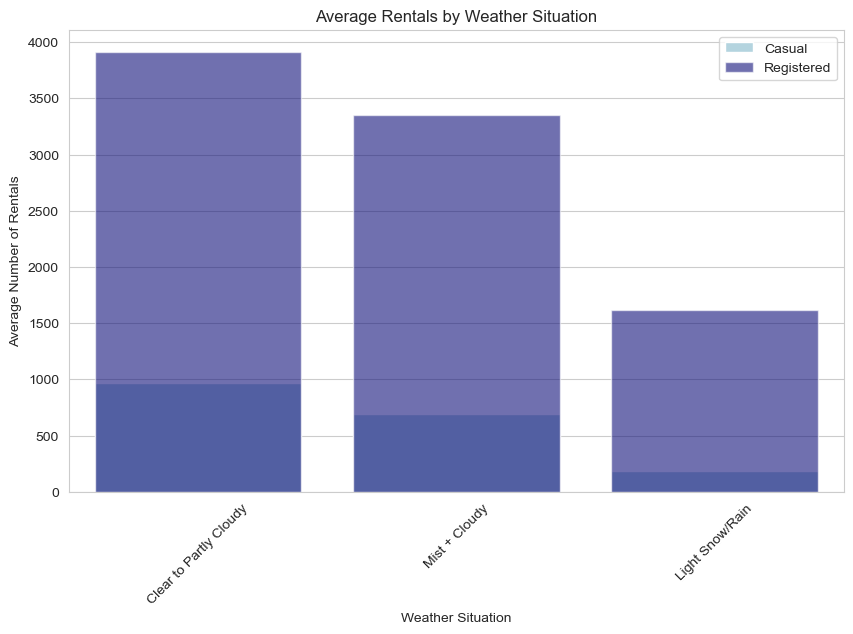

In [167]:
# Grouping data by weather situation for casual and registered users
weather_trends = df_original.groupby('weathersit').agg({'casual': 'mean', 'registered': 'mean'}).reset_index()
weather_trends['weathersit'] = weather_trends['weathersit'].map({
    1: 'Clear to Partly Cloudy',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})

# Plotting the impact of weather conditions
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_trends, x='weathersit', y='casual', color='lightblue', label='Casual')
sns.barplot(data=weather_trends, x='weathersit', y='registered', color='darkblue', alpha=0.6, label='Registered')
plt.title('Average Rentals by Weather Situation')
plt.ylabel('Average Number of Rentals')
plt.xlabel('Weather Situation')
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Average Daily Rentals for Casual and Registered Users Over Time

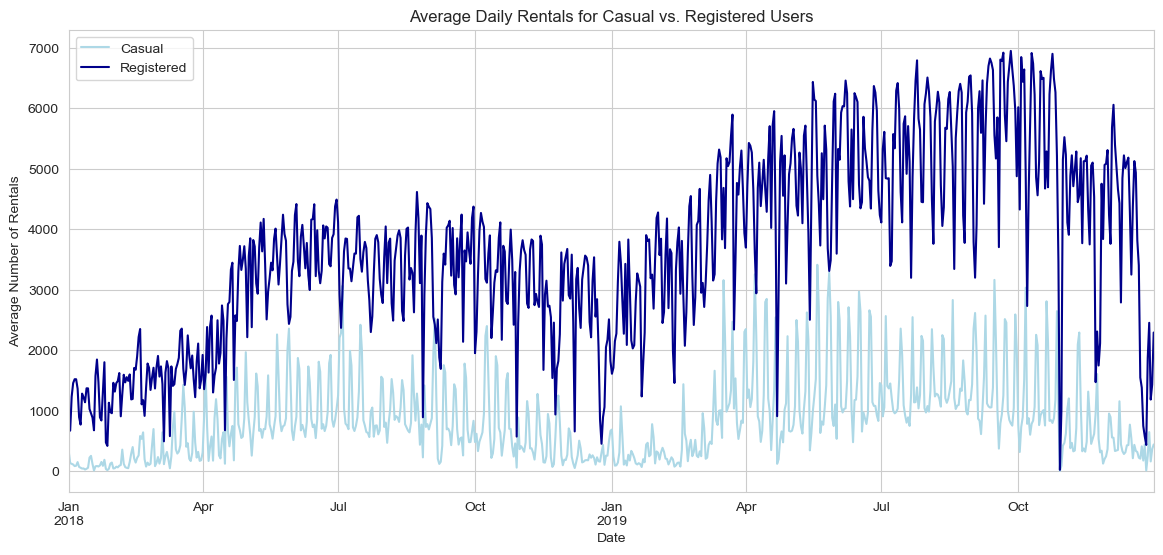

In [168]:
# Convert 'dteday' to datetime while specifying dayfirst=True
df_original['dteday'] = pd.to_datetime(df_original['dteday'], dayfirst=True)

# Set 'dteday' as the index of the DataFrame
daily_trends = df_original.set_index('dteday')

# Resampling to get average daily rentals
daily_avg = daily_trends.resample('D').mean()

# Plotting average daily rentals for casual and registered users over time
plt.figure(figsize=(14, 6))
daily_avg['casual'].plot(color='lightblue', label='Casual')
daily_avg['registered'].plot(color='darkblue', label='Registered')
plt.title('Average Daily Rentals for Casual vs. Registered Users')
plt.xlabel('Date')
plt.ylabel('Average Number of Rentals')
plt.legend()
plt.show()
